In [606]:
import numpy as np
import cv2 
import skimage.exposure
import skimage.io
import matplotlib.pyplot as plt
from pathlib import Path
import os
from os import listdir
from os.path import isfile, join

# plt.style.use('seaborn')
%matplotlib inline

In [607]:
#Функция обработки одного изображения
def process(path):
    image = cv2.imread(path)
    h, w, _ = image.shape
    image = cv2.resize(image.copy(), (w // 2, h // 2))
    image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)

    # grayscale
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)
    return gray

In [608]:
path0 = 'desert_forest/test_image_00.jpg'
path1 = 'desert_forest/test_image_01.jpg'
path2 = 'desert_forest/test_image_02.jpg'
path3 = 'desert_forest/test_image_03.jpg'
path4 = 'desert_forest/test_image_04.jpg'
path5 = 'desert_forest/test_image_05.jpg'
path6 = 'desert_forest/test_image_06.jpg'
path7 = 'desert_forest/test_image_07.jpg'
path8 = 'desert_forest/test_image_08.jpg'
path9 = 'desert_forest/test_image_09.jpg'
path10 = 'desert_forest/test_image_10.jpg'
path11 = 'desert_forest/test_image_11.jpg'
path12 = 'desert_forest/test_image_12.jpg'
path13 = 'desert_forest/test_image_13.jpg'
path14 = 'desert_forest/test_image_14.jpg'
path15 = 'desert_forest/test_image_15.jpg'

paths = [path0, path1, path2, path3,
         path4, path5, path6, path7,
         path8, path9, path10, path11,
         path12, path13, path14, path15,]



In [609]:
#Список серых изображений
grays = list()
for i in range(len(paths)):
    grays.append(process(paths[i]))

#Список гистограмм
hists = list()
for i in range(len(paths)):
    hist = cv2.calcHist([grays[i].ravel()], [0], None, [256], [0, 256])
    hists.append(hist)

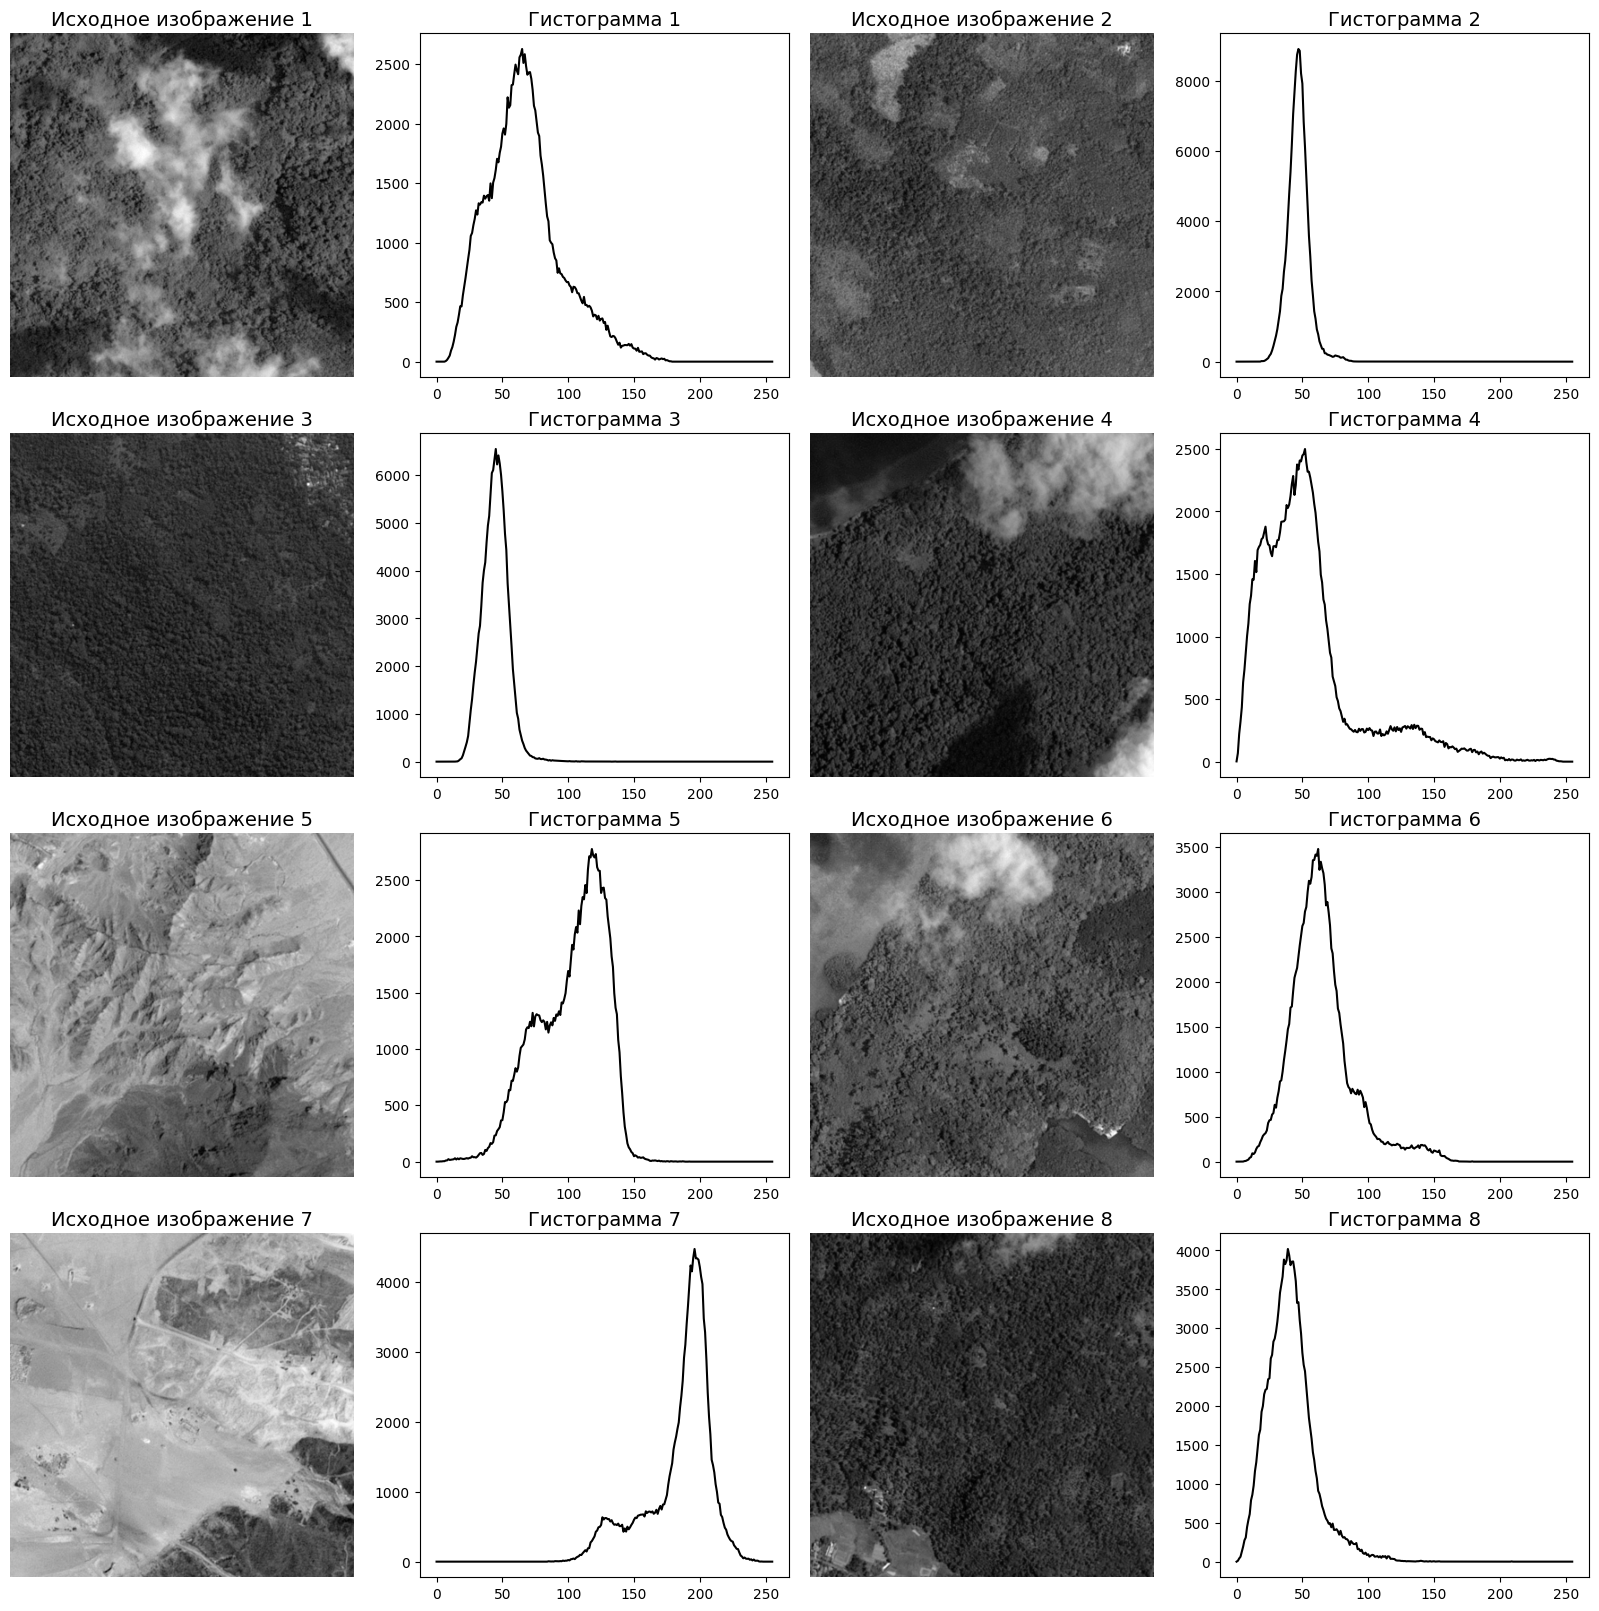

In [610]:

plt.figure(figsize=(16, 16), constrained_layout=True)

# Цикл для отображения изображений и их гистограмм
for i in range(8):
    # Изображение
    plt.subplot(4, 4, 2 * i + 1)  # Нечетные индексы для изображений
    plt.imshow(grays[i], cmap='gray')
    plt.axis('off')  # Отключаем оси
    plt.title(f'Исходное изображение {i + 1}', fontsize=14)

    # Гистограмма
    plt.subplot(4, 4, 2 * i + 2)  # Четные индексы для гистограмм
    plt.plot(hists[i], color='black')  # Задаем цвет линии
    plt.title(f'Гистограмма {i + 1}', fontsize=14)
   


plt.show()

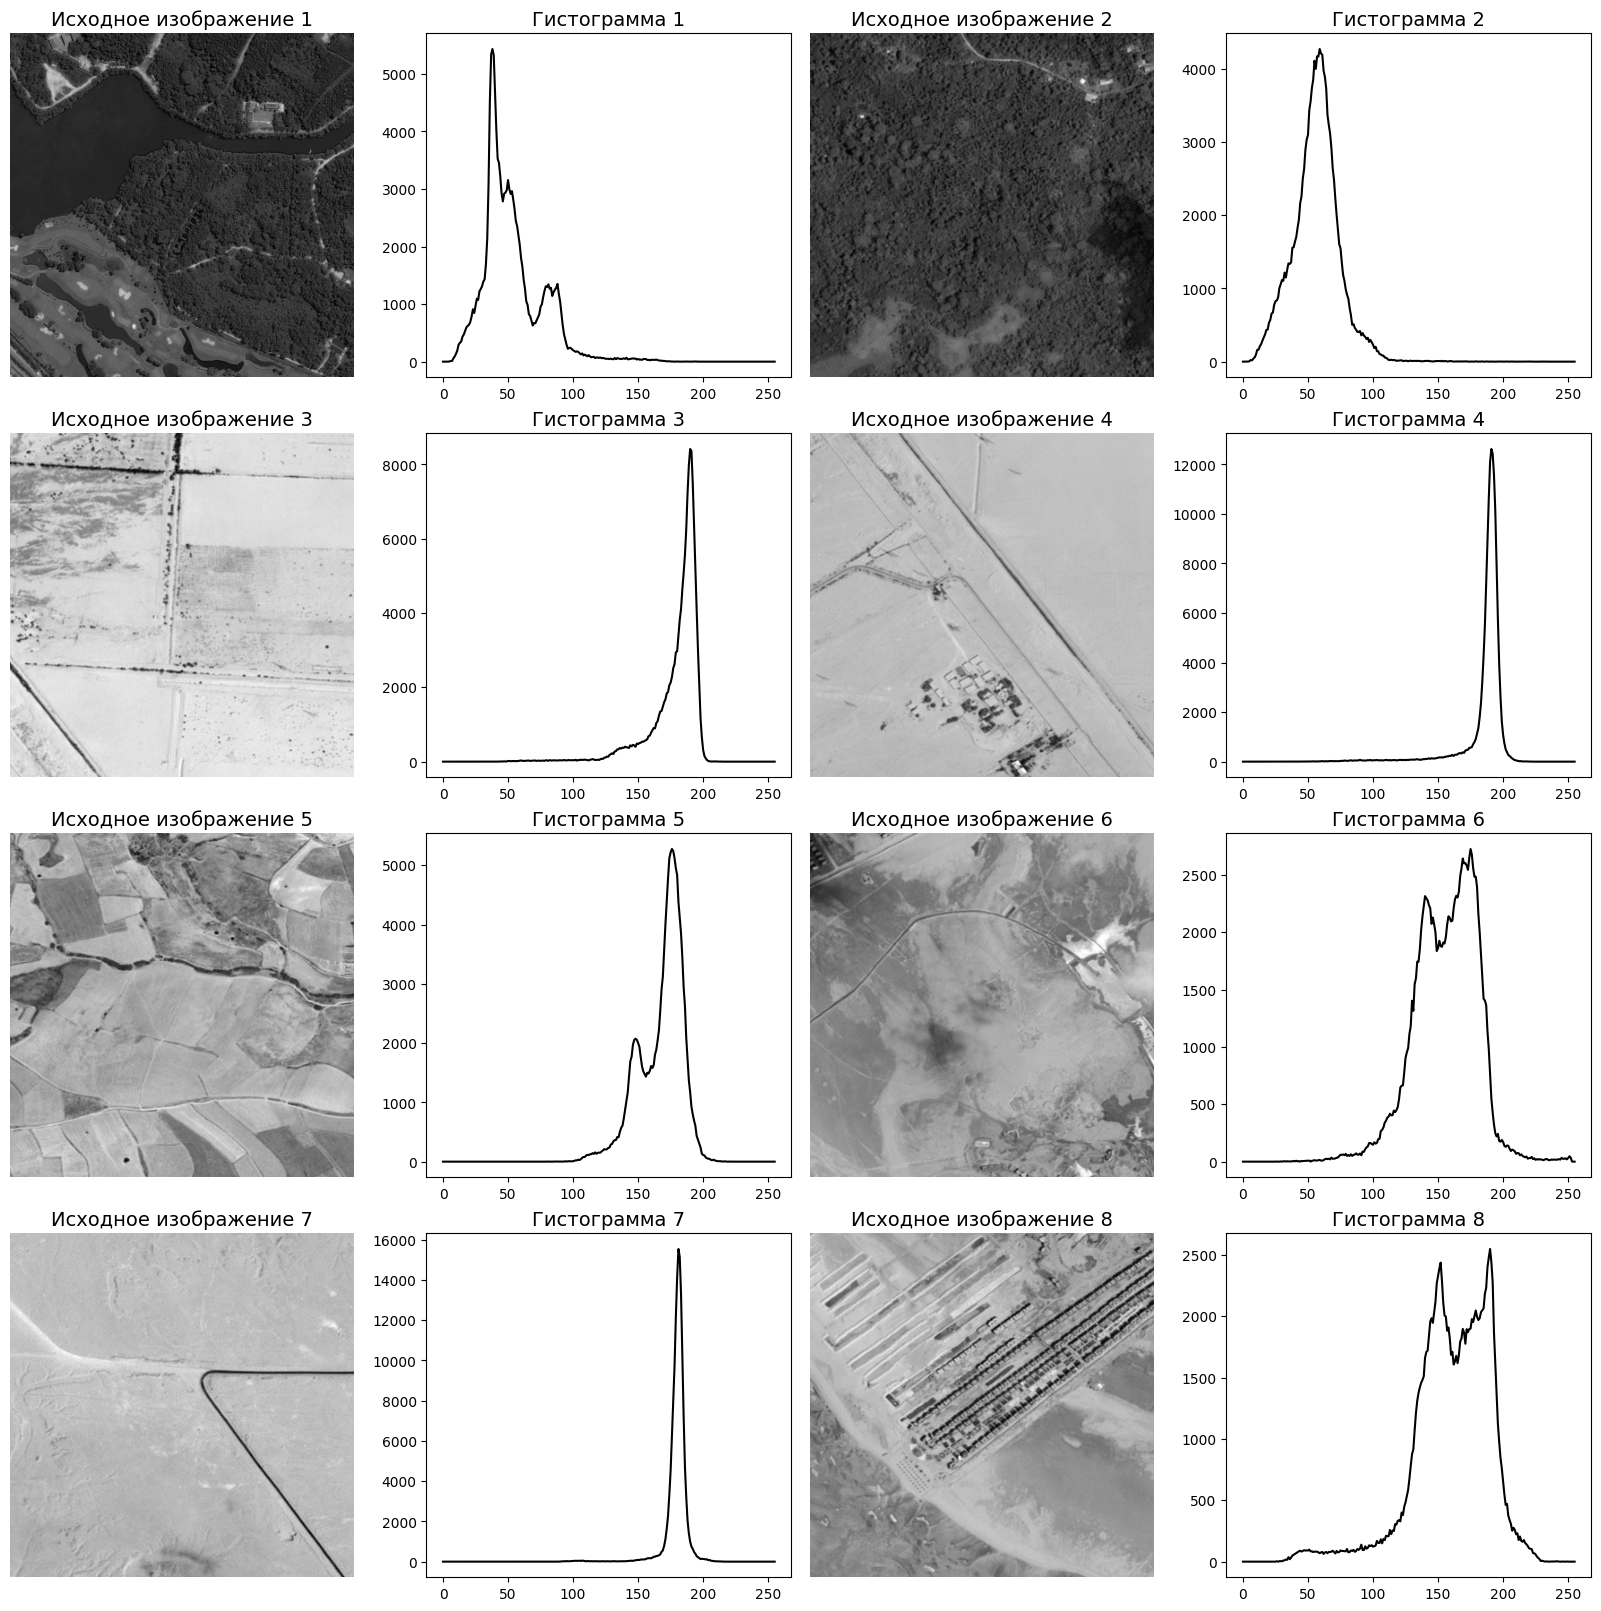

In [611]:
paths =  [path8, path9, path10, path11,
         path12, path13, path14, path15,]

#Список серых изображений
grays = list()
for i in range(len(paths)):
    grays.append(process(paths[i]))

#Список гистограмм
hists = list()
for i in range(len(paths)):
    hist = cv2.calcHist([grays[i].ravel()], [0], None, [256], [0, 256])
    hists.append(hist)



plt.figure(figsize=(16, 16), constrained_layout=True)

# Цикл для отображения изображений и их гистограмм
for i in range(8):
    # Изображение
    plt.subplot(4, 4, 2 * i + 1)  # Нечетные индексы для изображений
    plt.imshow(grays[i], cmap='gray')
    plt.axis('off')  # Отключаем оси
    plt.title(f'Исходное изображение {i + 1}', fontsize=14)

    # Гистограмма
    plt.subplot(4, 4, 2 * i + 2)  # Четные индексы для гистограмм
    plt.plot(hists[i], color='black')  # Задаем цвет линии
    plt.title(f'Гистограмма {i + 1}', fontsize=14)
   


plt.show()


In [612]:
# hist = cv2.calcHist([gray.ravel()], [0], None, [256], [0, 256])

# plt.figure(figsize=(6.4 * 1.2, 4.8 * 2), constrained_layout=True)

# plt.subplot(211)
# plt.imshow(gray0, cmap='gray'),
# plt.axis('off'), plt.title('Исходное изображение')

# plt.subplot(212)
# plt.plot(hist)
# plt.title('Гистограмма по освещенности')

# plt.show()

In [ ]:
def process(image):    
    h, w, _ = image.shape
    image = cv2.resize(image.copy(), (w // 2, h // 2))
    image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)
    return gray

def calc_hist(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
    return hist

def image_class(hist):
    desert_threshhold = 60000
    print(np.sum(hist[0:100]))
    if(np.sum(hist[0:100]) < desert_threshhold):
        return "desert"
    else:
        return "forest"
    

In [614]:
images = list()

for i in range(16):
    if(i < 10):
        image = cv2.imread(f'desert_forest/test_image_0{i}.jpg')        
    else:
        image = cv2.imread(f'desert_forest/test_image_{i}.jpg')              
    images.append(image)


In [615]:
#Список серых изображений
grays = list()
for i in range(16):
    grays.append(process(images[i]))

#Список гистограмм
hists = list()
for i in range(16):
    hist = cv2.calcHist([grays[i].ravel()], [0], None, [256], [0, 256])
    hists.append(hist)

In [ ]:
photo_classes = list()

for i in range(16):
    photo_class = image_class(hists[i])
    if (photo_class == 'desert'):
        photo_classes.append('desert')
    else:
        photo_classes.append('forest')


128393.0
147446.0
147323.0
129728.0
58184.0
136245.0
107.0
145925.0
142796.0
145448.0
1422.0
1559.0
45.0
2590.0
210.0
5567.0
['forest', 'forest', 'forest', 'forest', 'desert', 'forest', 'desert', 'forest', 'forest', 'forest', 'desert', 'desert', 'desert', 'desert', 'desert', 'desert']


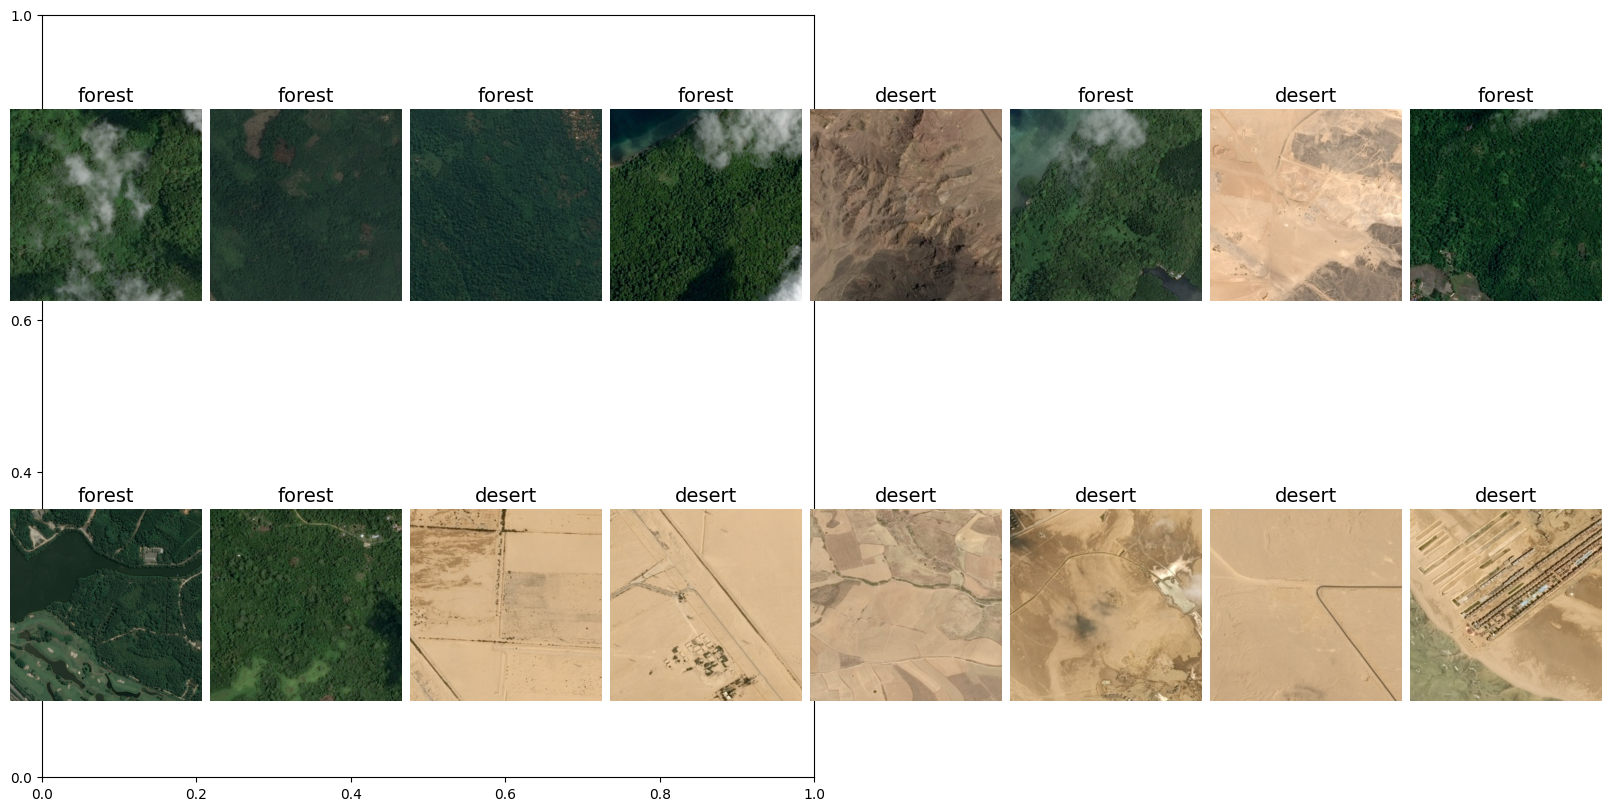

In [ ]:
plt.figure(figsize=(16, 8), constrained_layout=True)



plt.subplot(1, 2, 1)
for i, img in enumerate(images):
    plt.subplot(2, len(images) // 2, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))   
    if(photo_classes[i] == 'forest'):
        plt.title('forest', fontsize=14)
        plt.axis('off')
    else:
        plt.title('desert', fontsize=14)
        plt.axis('off')

plt.axis('off')
plt.show()